## Load the Library

In [57]:
import math
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
def llfun(act, pred):
    """ Logloss function for 1/0 probability
    """
    return (-(~(act == pred)).astype(int) * math.log(1e-15)).sum() / len(act)

## Load the Data

In [59]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data Exploration

In [60]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(68353, 13) (45978, 12) (114331, 13)


In [61]:
data

,Customer_Location,Email_Campaign_Type,Email_ID,Email_Source_Type,Email_Status,Email_Type,Subject_Hotness_Score,Time_Email_sent_Category,Total_Images,Total_Links,Total_Past_Communications,Word_Count,source
0,E,2,EMA00081000034500,2,0.0,1,2.2,1,0.0,8.0,33.0,440,train
1,NaN,2,EMA00081000045360,1,0.0,2,2.1,2,0.0,5.0,15.0,504,train
2,B,3,EMA00081000066290,1,1.0,2,0.1,2,0.0,5.0,36.0,962,train
3,E,2,EMA00081000076560,2,0.0,1,3.0,2,0.0,16.0,25.0,610,train
4,C,3,EMA00081000109720,2,0.0,1,0.0,2,0.0,4.0,18.0,947,train
5,G,2,EMA00081000131660,1,0.0,1,1.5,2,0.0,11.0,NaN,416,train
6,E,2,EMA00081000160500,1,0.0,1,3.2,3,0.0,4.0,34.0,116,train
7,G,2,EMA00081000269630,2,0.0,1,0.7,2,2.0,6.0,21.0,1241,train
8,G,2,EMA00081000287790,1,0.0,1,2.0,3,4.0,11.0,NaN,655,train
9,G,2,EMA00081000367310,1,0.0,2,0.5,3,0.0,11.0,40.0,655,train


In [62]:
sorted1 = data.sort(['Customer_Location', 'Email_Campaign_Type'], ascending=[1, 0])
sorted1[sorted1['Customer_Location'] == 'D']['Email_Campaign_Type'].count()


C:\Users\ranjank\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


12243

### Missing Data

In [63]:
data.apply(lambda x: sum(x.isnull()))

Customer_Location            19438
Email_Campaign_Type              0
Email_ID                         0
Email_Source_Type                0
Email_Status                 45978
Email_Type                       0
Subject_Hotness_Score            0
Time_Email_sent_Category         0
Total_Images                  2770
Total_Links                   3624
Total_Past_Communications    11515
Word_Count                       0
source                           0
dtype: int64

In [64]:
data.describe()

,Email_Campaign_Type,Email_Source_Type,Email_Status,Email_Type,Subject_Hotness_Score,Time_Email_sent_Category,Total_Images,Total_Links,Total_Past_Communications,Word_Count
count,114331.000000,114331.000000,68353.000000,114331.000000,114331.000000,114331.000000,111561.000000,110707.00000,102816.000000,114331.000000
mean,2.270539,1.456928,0.230934,1.284096,1.095876,1.997945,3.535178,10.41291,28.892225,701.350885
std,0.468056,0.498144,0.497032,0.450985,0.996247,0.631809,5.592399,6.39044,12.528849,271.875965
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,40.000000
25%,2.000000,1.000000,0.000000,1.000000,0.200000,2.000000,0.000000,6.00000,20.000000,521.000000
50%,2.000000,1.000000,0.000000,1.000000,0.800000,2.000000,0.000000,9.00000,28.000000,694.000000
75%,3.000000,2.000000,0.000000,2.000000,1.800000,2.000000,5.000000,14.00000,38.000000,880.000000
max,3.000000,2.000000,2.000000,2.000000,5.000000,3.000000,47.000000,49.00000,67.000000,1316.000000


In [65]:
data.apply(lambda x: len(x.unique()))

Customer_Location                 9
Email_Campaign_Type               3
Email_ID                     114331
Email_Source_Type                 2
Email_Status                      4
Email_Type                        2
Subject_Hotness_Score            51
Time_Email_sent_Category          3
Total_Images                     47
Total_Links                      38
Total_Past_Communications        65
Word_Count                      151
source                            2
dtype: int64

In [66]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Email_ID','source']]

#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Customer_Location
G    38818
E    17052
D    12243
C     9725
F     7368
B     7236
A     2416
H       35
Name: Customer_Location, dtype: int64


In [67]:
categorical_columns

['Customer_Location']

## Data Cleaning

In [68]:
#[x for x in data.values if x not in data[data['Customer_Location'].isnull()]]
#data[data['Customer_Location'].isnull()]
features = ['Email_Campaign_Type', 'Email_Source_Type', 'Email_Type',
       'Subject_Hotness_Score', 'Time_Email_sent_Category', 'Word_Count']
target = ['Customer_Location']

le = LabelEncoder()
data1 = data[features + target].loc[data['Customer_Location'].isnull() == False]
X = data1[features]
y = data1[target]
y = le.fit_transform(y)
print(len(X), y)

94893 [4 1 4 ..., 6 4 4]


C:\Users\ranjank\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [70]:
print(len(X_train),  len(y_train), len(X_test), len(y_test))
print(y_train, y_test)

75914 75914 18979 18979
[6 6 3 ..., 5 6 0] [6 5 4 ..., 6 6 1]


In [71]:
# Fit
logloss = []
for i in range(1, 50, 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    outcome = knn.predict(X_test)
    
    # Logloss
    logloss.append(llfun(y_test, outcome))

[]

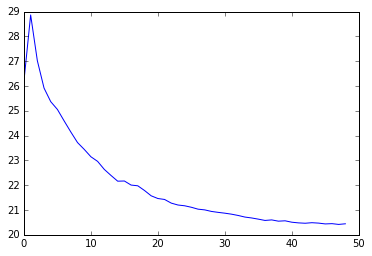

In [72]:
plt.plot(logloss)
plt.plot()
#plt.savefig('n_neighbors_vs_logloss.png')

In [73]:
data2 = data[features].loc[data['Customer_Location'].isnull() == True]

In [74]:
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(X, y)
outcomes = knn.predict(data2)

In [75]:
outcomes = le.inverse_transform(outcomes)

In [76]:
#outcomes = pd.DataFrame(outcomes)
#outcomes.apply(lambda x: sum(x.isnull()))

In [77]:
data2.loc[:,'Customer_Location'] = pd.Series(outcomes, index=data2.index)

In [78]:
data2.apply(lambda x: sum(x.isnull()))

Email_Campaign_Type         0
Email_Source_Type           0
Email_Type                  0
Subject_Hotness_Score       0
Time_Email_sent_Category    0
Word_Count                  0
Customer_Location           0
dtype: int64

In [79]:
data3 = data1.append(data2)

In [80]:
data.head()

,Customer_Location,Email_Campaign_Type,Email_ID,Email_Source_Type,Email_Status,Email_Type,Subject_Hotness_Score,Time_Email_sent_Category,Total_Images,Total_Links,Total_Past_Communications,Word_Count,source
0,E,2,EMA00081000034500,2,0.0,1,2.2,1,0.0,8.0,33.0,440,train
1,NaN,2,EMA00081000045360,1,0.0,2,2.1,2,0.0,5.0,15.0,504,train
2,B,3,EMA00081000066290,1,1.0,2,0.1,2,0.0,5.0,36.0,962,train
3,E,2,EMA00081000076560,2,0.0,1,3.0,2,0.0,16.0,25.0,610,train
4,C,3,EMA00081000109720,2,0.0,1,0.0,2,0.0,4.0,18.0,947,train


In [81]:
data.columns

Index(['Customer_Location', 'Email_Campaign_Type', 'Email_ID',
       'Email_Source_Type', 'Email_Status', 'Email_Type',
       'Subject_Hotness_Score', 'Time_Email_sent_Category', 'Total_Images',
       'Total_Links', 'Total_Past_Communications', 'Word_Count', 'source'],
      dtype='object')

In [82]:
data3.columns

Index(['Email_Campaign_Type', 'Email_Source_Type', 'Email_Type',
       'Subject_Hotness_Score', 'Time_Email_sent_Category', 'Word_Count',
       'Customer_Location'],
      dtype='object')

In [83]:
remaining_columns = [x for x in data.columns if x not in data3.columns]
remaining_columns

['Email_ID',
 'Email_Status',
 'Total_Images',
 'Total_Links',
 'Total_Past_Communications',
 'source']

In [84]:
data3[remaining_columns] = data[remaining_columns]

In [85]:
data3.head()

,Email_Campaign_Type,Email_Source_Type,Email_Type,Subject_Hotness_Score,Time_Email_sent_Category,Word_Count,Customer_Location,Email_ID,Email_Status,Total_Images,Total_Links,Total_Past_Communications,source
0,2,2,1,2.2,1,440,E,EMA00081000034500,0.0,0.0,8.0,33.0,train
2,3,1,2,0.1,2,962,B,EMA00081000066290,1.0,0.0,5.0,36.0,train
3,2,2,1,3.0,2,610,E,EMA00081000076560,0.0,0.0,16.0,25.0,train
4,3,2,1,0.0,2,947,C,EMA00081000109720,0.0,0.0,4.0,18.0,train
5,2,1,1,1.5,2,416,G,EMA00081000131660,0.0,0.0,11.0,NaN,train


In [86]:
data3.apply(lambda x: sum(x.isnull()))

Email_Campaign_Type              0
Email_Source_Type                0
Email_Type                       0
Subject_Hotness_Score            0
Time_Email_sent_Category         0
Word_Count                       0
Customer_Location                0
Email_ID                         0
Email_Status                 45978
Total_Images                  2770
Total_Links                   3624
Total_Past_Communications    11515
source                           0
dtype: int64

In [87]:
features4 = ['Email_Campaign_Type', 'Email_Source_Type', 'Email_Type',
       'Subject_Hotness_Score', 'Time_Email_sent_Category', 'Total_Images',
       'Total_Links', 'Total_Past_Communications', 'Word_Count']
data4 = data3[features4]
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputed_data = imputer.fit_transform(data4)
data5 = pd.DataFrame(imputed_data, index=data4.index, columns=data4.columns)

In [88]:
data3.columns

Index(['Email_Campaign_Type', 'Email_Source_Type', 'Email_Type',
       'Subject_Hotness_Score', 'Time_Email_sent_Category', 'Word_Count',
       'Customer_Location', 'Email_ID', 'Email_Status', 'Total_Images',
       'Total_Links', 'Total_Past_Communications', 'source'],
      dtype='object')

In [89]:
data5[['source', 'Email_ID', 'Email_Status', 'Customer_Location']] = data3[['source', 'Email_ID', 'Email_Status', 'Customer_Location']]

In [90]:
data5.apply(lambda x: sum(x.isnull()))

Email_Campaign_Type              0
Email_Source_Type                0
Email_Type                       0
Subject_Hotness_Score            0
Time_Email_sent_Category         0
Total_Images                     0
Total_Links                      0
Total_Past_Communications        0
Word_Count                       0
source                           0
Email_ID                         0
Email_Status                 45978
Customer_Location                0
dtype: int64

In [91]:
data5.head()

,Email_Campaign_Type,Email_Source_Type,Email_Type,Subject_Hotness_Score,Time_Email_sent_Category,Total_Images,Total_Links,Total_Past_Communications,Word_Count,source,Email_ID,Email_Status,Customer_Location
0,2.0,2.0,1.0,2.2,1.0,0.0,8.0,33.000000,440.0,train,EMA00081000034500,0.0,E
2,3.0,1.0,2.0,0.1,2.0,0.0,5.0,36.000000,962.0,train,EMA00081000066290,1.0,B
3,2.0,2.0,1.0,3.0,2.0,0.0,16.0,25.000000,610.0,train,EMA00081000076560,0.0,E
4,3.0,2.0,1.0,0.0,2.0,0.0,4.0,18.000000,947.0,train,EMA00081000109720,0.0,C
5,2.0,1.0,1.0,1.5,2.0,0.0,11.0,28.892225,416.0,train,EMA00081000131660,0.0,G


In [92]:
#One Hot Coding:
data5 = pd.get_dummies(data5, columns=['Email_Campaign_Type','Email_Source_Type','Email_Type','Time_Email_sent_Category',
                              'Customer_Location'])

In [93]:
data5.apply(lambda x: sum(x.isnull()))
data5.describe()

,Subject_Hotness_Score,Total_Images,Total_Links,Total_Past_Communications,Word_Count,Email_Status,Email_Campaign_Type_1.0,Email_Campaign_Type_2.0,Email_Campaign_Type_3.0,Email_Source_Type_1.0,...,Time_Email_sent_Category_2.0,Time_Email_sent_Category_3.0,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Customer_Location_H
count,114331.000000,114331.000000,114331.000000,114331.000000,114331.000000,68353.000000,114331.000000,114331.000000,114331.000000,114331.000000,...,114331.000000,114331.000000,114331.000000,114331.000000,114331.000000,114331.000000,114331.000000,114331.000000,114331.000000,114331.000000
mean,1.095876,3.535178,10.412910,28.892225,701.350885,0.230934,0.010863,0.707735,0.281402,0.543072,...,0.600817,0.198564,0.021132,0.063325,0.085104,0.107556,0.152924,0.064444,0.505209,0.000306
std,0.996247,5.524236,6.288343,11.881173,271.875965,0.497032,0.103659,0.454806,0.449685,0.498144,...,0.489733,0.398921,0.143824,0.243547,0.279037,0.309820,0.359916,0.245544,0.499975,0.017494
min,0.000000,0.000000,1.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,6.000000,20.000000,521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.800000,0.000000,9.000000,28.892225,694.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.800000,5.000000,14.000000,37.000000,880.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,47.000000,49.000000,67.000000,1316.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
data_ss = data5[['Subject_Hotness_Score', 'Total_Images', 'Total_Links', 'Total_Past_Communications', 'Word_Count']]
ss = StandardScaler()
data_ss_array = ss.fit_transform(data_ss)
data6 = pd.DataFrame(data_ss_array, index=data_ss.index, columns=data_ss.columns)
data5[['Subject_Hotness_Score', 'Total_Images', 'Total_Links', 'Total_Past_Communications', 'Word_Count']] = data6
data5

,Subject_Hotness_Score,Total_Images,Total_Links,Total_Past_Communications,Word_Count,source,Email_ID,Email_Status,Email_Campaign_Type_1.0,Email_Campaign_Type_2.0,...,Time_Email_sent_Category_2.0,Time_Email_sent_Category_3.0,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Customer_Location_H
0,1.108288,-0.639942,-0.383713,0.345740,-0.961291,train,EMA00081000034500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.999632,-0.639942,-0.860788,0.598241,0.958710,train,EMA00081000066290,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.911305,-0.639942,0.888488,-0.327597,-0.336004,train,EMA00081000076560,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.100009,-0.639942,-1.019814,-0.916767,0.903538,train,EMA00081000109720,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.405648,-0.639942,0.093362,0.000000,-1.049567,train,EMA00081000131660,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2.112059,-0.639942,-1.019814,0.429907,-2.153017,train,EMA00081000160500,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,-0.397369,-0.277900,-0.701763,-0.664266,1.984918,train,EMA00081000269630,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.907534,0.084143,0.093362,0.000000,-0.170486,train,EMA00081000287790,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-0.598123,-0.639942,0.093362,0.934910,-0.170486,train,EMA00081000367310,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,-0.899255,-0.639942,-0.701763,-0.159263,0.156870,train,EMA00081000428660,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
data5.dtypes

Subject_Hotness_Score           float64
Total_Images                    float64
Total_Links                     float64
Total_Past_Communications       float64
Word_Count                      float64
source                           object
Email_ID                         object
Email_Status                    float64
Email_Campaign_Type_1.0         float64
Email_Campaign_Type_2.0         float64
Email_Campaign_Type_3.0         float64
Email_Source_Type_1.0           float64
Email_Source_Type_2.0           float64
Email_Type_1.0                  float64
Email_Type_2.0                  float64
Time_Email_sent_Category_1.0    float64
Time_Email_sent_Category_2.0    float64
Time_Email_sent_Category_3.0    float64
Customer_Location_A             float64
Customer_Location_B             float64
Customer_Location_C             float64
Customer_Location_D             float64
Customer_Location_E             float64
Customer_Location_F             float64
Customer_Location_G             float64


In [96]:
#Divide into test and train:
train = data5.loc[data['source']=="train"]
test = data5.loc[data['source']=="test"]

In [97]:
test.apply(lambda x: sum(x.isnull()))

Subject_Hotness_Score               0
Total_Images                        0
Total_Links                         0
Total_Past_Communications           0
Word_Count                          0
source                              0
Email_ID                            0
Email_Status                    45978
Email_Campaign_Type_1.0             0
Email_Campaign_Type_2.0             0
Email_Campaign_Type_3.0             0
Email_Source_Type_1.0               0
Email_Source_Type_2.0               0
Email_Type_1.0                      0
Email_Type_2.0                      0
Time_Email_sent_Category_1.0        0
Time_Email_sent_Category_2.0        0
Time_Email_sent_Category_3.0        0
Customer_Location_A                 0
Customer_Location_B                 0
Customer_Location_C                 0
Customer_Location_D                 0
Customer_Location_E                 0
Customer_Location_F                 0
Customer_Location_G                 0
Customer_Location_H                 0
dtype: int64

In [98]:
#Drop unnecessary columns:
test.drop(['Email_Status','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\ranjank\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ranjank\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [99]:
#Export files as modified versions:
train.to_csv("train_modified1.csv",index=False)
test.to_csv("test_modified1.csv",index=False)